Projekt MNwS - Aleksander Folfas 411052

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, kstest, chisquare

Zadanie 2

Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd I rodzaju) w teście Kołmogorowa i teście 𝜒2 w przypadku weryfikacji zgodności z rozkładem 𝜒2 o różnych stopniach swobody, tzn. generować dane pochodzące z rozkładu 𝜒2 o 𝑘 stopniach swobody i 
weryfikować hipotezę, że dane mają rozkład 𝜒2 o 𝑘 st. swobody. Należy porównać wyniki klasycznego sposobu testowania i testowania z wykorzystaniem PIT (probability integral transform).

Uzyskane wyniki należy przedstawić na odpowiednich wykresach ilustrujących moce testów z uwzględnieniem:
- liczby danych,
- liczby stopni swobody generowanego rozkładu.

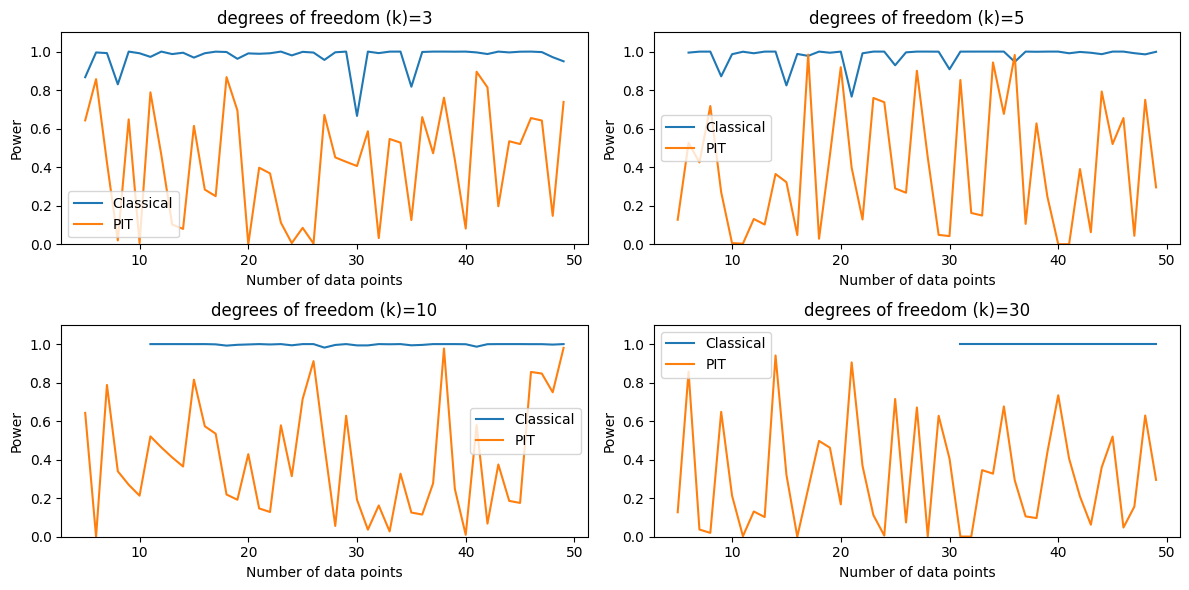

In [4]:
def simulate_chisquare(n_samples, df_values):
    powers_classic = np.zeros((len(df_values), len(n_samples)))
    powers_pit = np.zeros((len(df_values), len(n_samples)))
    
    for i, k in enumerate(df_values):
        for j, n in enumerate(n_samples):
            # Generowanie danych z rozkładu chi-kwadrat o k stopniach swobody
            data = chi2.rvs(k, size=n)

            # Klasyczne podejście
            _, p_value_classic = chisquare(data, ddof=k-1)
            power_classic = 1 - p_value_classic
            powers_classic[i, j] = power_classic

            # Podejście PIT
            u = chi2.cdf(data, k)
            u_uniform = np.random.uniform(size=n)
            _, p_value_pit = kstest(u_uniform, u)
            power_pit = 1 - p_value_pit
            powers_pit[i, j] = power_pit
            
    return powers_classic, powers_pit

# Ustawienie parametrów
np.random.seed(seed=411052)
n_samples = np.arange(5, 50)
df_values = np.array([3, 5, 10, 30])

# Symulacja danych i obliczenie mocy testu
powers_classic, powers_pit = simulate_chisquare(n_samples, df_values)

# Wykres
fig, axes = plt.subplots(nrows=2, ncols=len(df_values)//2, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.plot(n_samples, powers_classic[i], label='Classical')
    ax.plot(n_samples, powers_pit[i], label='PIT')
    ax.set_title(f'degrees of freedom (k)={df_values[i]}')
    ax.set_xlabel('Number of data points')
    ax.set_ylabel('Power')
    ax.set_ylim(0, 1.1)
    ax.legend()
plt.tight_layout()
plt.show()
